In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.9 MB/s eta 0:00:00


In [45]:
import pandas as pd
import os
import numpy as np
from catboost import CatBoostClassifier, Pool,CatBoostRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,mean_squared_error,r2_score
from sklearn.multioutput import MultiOutputRegressor

import matplotlib.pyplot as plt
import seaborn as sns
import joblib

current_path = os.getcwd()
root_path = os.path.dirname(current_path)
root_path = os.path.dirname(root_path)

step2_injury_data_path= root_path + '/data/'





In [ ]:
import sys
print(sys.version)

!pip show catboost

!pip show scikit-learn

3.10.12 (main, Nov  6 2024, 20:22:13) [GCC 11.4.0]
Name: catboost
Version: 1.2.7
Summary: CatBoost Python Package
Home-page: https://catboost.ai
Author: CatBoost Developers
Author-email: 
License: Apache License, Version 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: graphviz, matplotlib, numpy, pandas, plotly, scipy, six
Required-by: 
Name: scikit-learn
Version: 1.5.2
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License: BSD 3-Clause License
        
        Copyright (c) 2007-2024 The scikit-learn developers.
        All rights reserved.
        
        Redistribution and use in source and binary forms, with or without
        modification, are permitted provided that the following conditions are met:
        
        * Redistributions of source code must retain the above copyright notice, this
          list of conditions and the following disclaimer.
        
        * Redistribut

In [ ]:
package_versions = {
    'pandas': pd.__version__,
    'os': 'builtin',
    'numpy': np.__version__,
    #'catboost': catboost.__version__,
    #'scikit-learn': sklearn.__version__,
    #'matplotlib': matplotlib.__version__,
    'seaborn': sns.__version__,
    'joblib': joblib.__version__
}

package_versions

{'pandas': '2.2.2',
 'os': 'builtin',
 'numpy': '1.26.4',
 'seaborn': '0.13.1',
 'joblib': '1.4.2'}

In [38]:
step2_injury_data_path

'/content/gdrive/Othercomputers/My Computer/Fire_risk_main/data/hongru_share//step_2/injury_severity/processed_data/'

In [42]:
df=pd.read_pickle(step2_injury_data_path + '/df_inj_github.pkl')

In [44]:
df.shape

(34074, 51)

In [9]:
df.columns

Index(['STATE', 'NUM_UNIT', 'CAUSE_IGN', 'FIRE_SPRD', 'BLDG_ABOVE',
       'BLDG_BELOW', 'TOT_SQ_FT', 'FIRE_ORIG', 'FLAME_SPRD', 'DETECTOR',
       'DET_OPERAT', 'AES_PRES', 'INCIDENT_KEY', 'AID', 'SUP_APP', 'EMS_APP',
       'OTH_APP', 'SUP_PER', 'EMS_PER', 'OTH_PER', 'response_time',
       'last_unit_clear_time', 'accident_year', 'accident_month',
       'accident_day', 'accident_hour', 'median_income_list',
       'median_rent_list', 'total_population_list',
       'build_time_1939_and_earlier_list', 'Pct_HOU_Occupied_units_list',
       'Pct_HHF_Utility_gas_list', 'Pct_GRAPI_35_pct_or_more_list',
       'Pct_GRAPI_Less_than_15_pct_list', 'Pct_DIS_With_disability_list',
       'Pct_EDU_Less_than_9th_grade_list', 'Pct_EDU_Bachelor_or_higher_list',
       'Pct_HIC_With_coverage_list', 'Pct_SA_62_and_over_list',
       'Pct_EMP_Pop_16_and_over_in_labor_force_Civilian_labor_force_Employed_list',
       'temp', 'rhum', 'wspd', 'Minority populations', 'Black Alone', 'hum_1',
       'SEV_

In [10]:
columns_drop=['DET_OPERAT','build_time_1939_and_earlier_list','build_time_1940_to_1979_list','total_population_list','SUP_APP', 'EMS_APP', 'OTH_APP','Pct_GRAPI_35_pct_or_more_list',
       'Pct_GRAPI_Less_than_15_pct_list','Pct_EDU_Less_than_9th_grade_list',
       'SUP_PER', 'EMS_PER', 'OTH_PER','AID']
df.drop(columns=columns_drop,inplace=True)

In [11]:
object_columns = df.select_dtypes(include=['object']).columns
print("Object columns:")
print(object_columns)

# Print float columns
float_columns = df.select_dtypes(include=['float','int']).columns
print("Float columns:")
print(float_columns)

Object columns:
Index(['STATE', 'CAUSE_IGN', 'FIRE_SPRD', 'FLAME_SPRD', 'DETECTOR', 'AES_PRES',
       'INCIDENT_KEY', 'accident_year', 'accident_month', 'accident_day',
       'accident_hour', 'hum_1', 'AREA_ORIG_new', 'ACT_TAK1_new',
       'FACT_IGN1_new', 'HEAT_SOURCE_new', 'FIRST_IGN_new', 'TYPE_MAT_new',
       'PROP_USE_new', 'SUP_FAC_1_new', 'ITEM_SPRD_new', 'MAT_SPRD_new'],
      dtype='object')
Float columns:
Index(['NUM_UNIT', 'BLDG_ABOVE', 'BLDG_BELOW', 'TOT_SQ_FT', 'FIRE_ORIG',
       'response_time', 'last_unit_clear_time', 'median_income_list',
       'median_rent_list', 'Pct_HOU_Occupied_units_list',
       'Pct_HHF_Utility_gas_list', 'Pct_DIS_With_disability_list',
       'Pct_EDU_Bachelor_or_higher_list', 'Pct_HIC_With_coverage_list',
       'Pct_SA_62_and_over_list',
       'Pct_EMP_Pop_16_and_over_in_labor_force_Civilian_labor_force_Employed_list',
       'temp', 'rhum', 'wspd', 'Minority populations', 'Black Alone', 'SEV_1',
       'SEV_2', 'SEV_3', 'SEV_4', 'SEV_5

In [23]:
df.shape

(34074, 51)

In [24]:
df.to_pickle(os.path.join(step2_injury_results_path, 'df_inj_github.pkl'))


In [18]:
# category prediction

df_label = df.copy()
#vsl_proportion = [x * 1000 for x in [0.003, 0.047, 0.105, 0.266, 1]]
vsl_proportion = [x * 1000 for x in [0.003, 0.047, 0.266, 0.593, 1]]


#vsl_proportion = [1,4,9,16,25]


# Multiply each column by its corresponding value in vsl_proportion
df_label['vsl_proportion'] = (
    df_label['SEV_1'] * vsl_proportion[0] +
    df_label['SEV_2'] * vsl_proportion[1] +
    df_label['SEV_3'] * vsl_proportion[2] +
    df_label['SEV_4'] * vsl_proportion[3] +
    df_label['SEV_5'] * vsl_proportion[4]
)

#thresholds = df_label['vsl_proportion'].quantile([0.4, 0.6, 0.8])
thresholds = df_label['vsl_proportion'].quantile([0.4,0.75])

print(thresholds)

bins = [0, thresholds[0.4],  thresholds[0.75],float('inf')]

#labels = ['Low Risk', 'Moderate Risk', 'High Risk', 'Very High Risk']
labels = ['0', '1', '2']
# Assign risk groups based on the thresholds
df_label['Risk_Group'] = pd.cut(df_label['vsl_proportion'], bins=bins, labels=labels, include_lowest=True)

X = df_label.drop(columns=['SEV_1', 'SEV_2', 'SEV_3', 'SEV_4', 'SEV_5', 'vsl_proportion','FIRE_SPRD','Risk_Group','last_unit_clear_time'])
y = df_label['Risk_Group']

# Identify categorical features
categorical_features = [col for col in X.columns if X[col].dtype == 'object']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2042)

# Create Pool objects for CatBoost
train_data = Pool(data=X_train, label=y_train, cat_features=categorical_features)
test_data = Pool(data=X_test, label=y_test, cat_features=categorical_features)

# Initialize and train the CatBoost model (now using classification)
model = CatBoostClassifier(iterations=1500,
                            depth=4,
                          learning_rate=0.1,
                            l2_leaf_reg=6,
                          class_weights=[1,1,1],
                          task_type='GPU',
                          loss_function='MultiClass',
                            random_state=2042)
model.fit(train_data, verbose=100)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the classification performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Classification Report:\n{report}')

0.40      6.0
0.75    593.0
Name: vsl_proportion, dtype: float64
0:	learn: 1.0764962	total: 41.8ms	remaining: 1m 2s
100:	learn: 0.8996960	total: 2.31s	remaining: 32s
200:	learn: 0.8832729	total: 3.04s	remaining: 19.7s
300:	learn: 0.8716328	total: 3.7s	remaining: 14.8s
400:	learn: 0.8617176	total: 4.32s	remaining: 11.8s
500:	learn: 0.8536159	total: 4.94s	remaining: 9.85s
600:	learn: 0.8457576	total: 5.54s	remaining: 8.28s
700:	learn: 0.8388021	total: 6.16s	remaining: 7.02s
800:	learn: 0.8305837	total: 6.8s	remaining: 5.94s
900:	learn: 0.8229243	total: 7.42s	remaining: 4.93s
1000:	learn: 0.8151618	total: 8.03s	remaining: 4s
1100:	learn: 0.8078373	total: 8.64s	remaining: 3.13s
1200:	learn: 0.8003847	total: 9.25s	remaining: 2.3s
1300:	learn: 0.7932377	total: 9.87s	remaining: 1.51s
1400:	learn: 0.7861991	total: 10.5s	remaining: 740ms
1499:	learn: 0.7798345	total: 11.1s	remaining: 0us
Accuracy: 0.55
Classification Report:
              precision    recall  f1-score   support

           0   

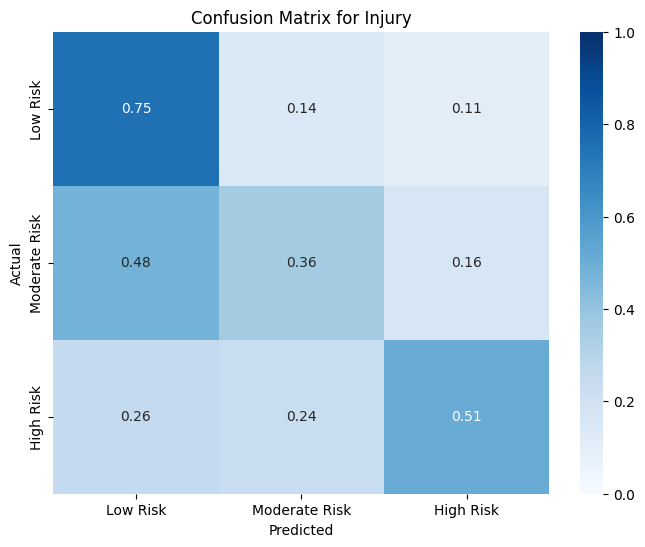

In [22]:
cm = confusion_matrix(y_test, y_pred)

# Normalize the confusion matrix to 0-1 scale
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Define the new labels
labels = ['Low Risk', 'Moderate Risk', 'High Risk']

# Plot the confusion matrix with a normalized color bar (0-1)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels, vmin=0, vmax=1)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Injury')
#plt.colorbar(label='Proportion')
plt.show()

